In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score
# Load data
df = pd.read_csv("indian_liver_patient (1).csv")
df.head()




,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [431]:
df.shape

(583, 11)

In [432]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [433]:
df.dropna(inplace=True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [434]:
df.shape

(579, 11)

In [435]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

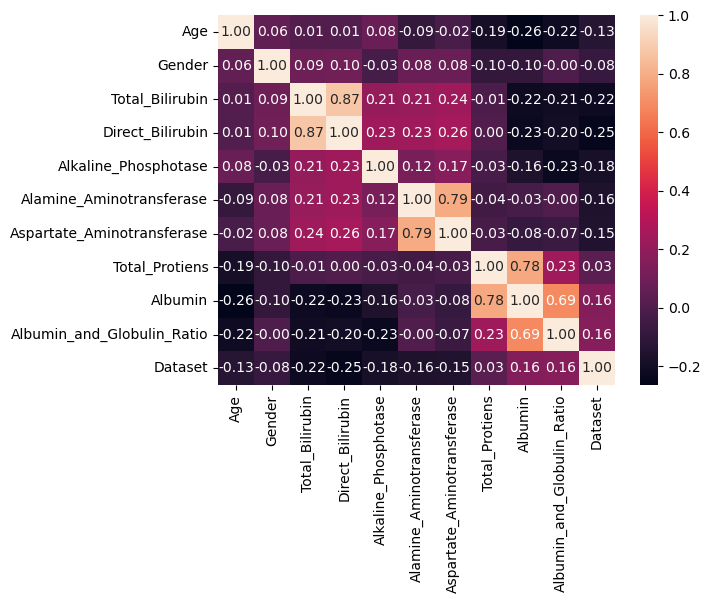

In [436]:
corr=df.corr()
sns.heatmap(corr,fmt='.2f',annot=True)
plt.show()

Age                           -0.033591
Gender                        -1.209212
Total_Bilirubin                4.890768
Direct_Bilirubin               3.199163
Alkaline_Phosphotase           3.753502
Alamine_Aminotransferase       6.527575
Aspartate_Aminotransferase    10.512251
Total_Protiens                -0.292433
Albumin                       -0.048516
Albumin_and_Globulin_Ratio     0.992299
Dataset                        0.955179
dtype: float64


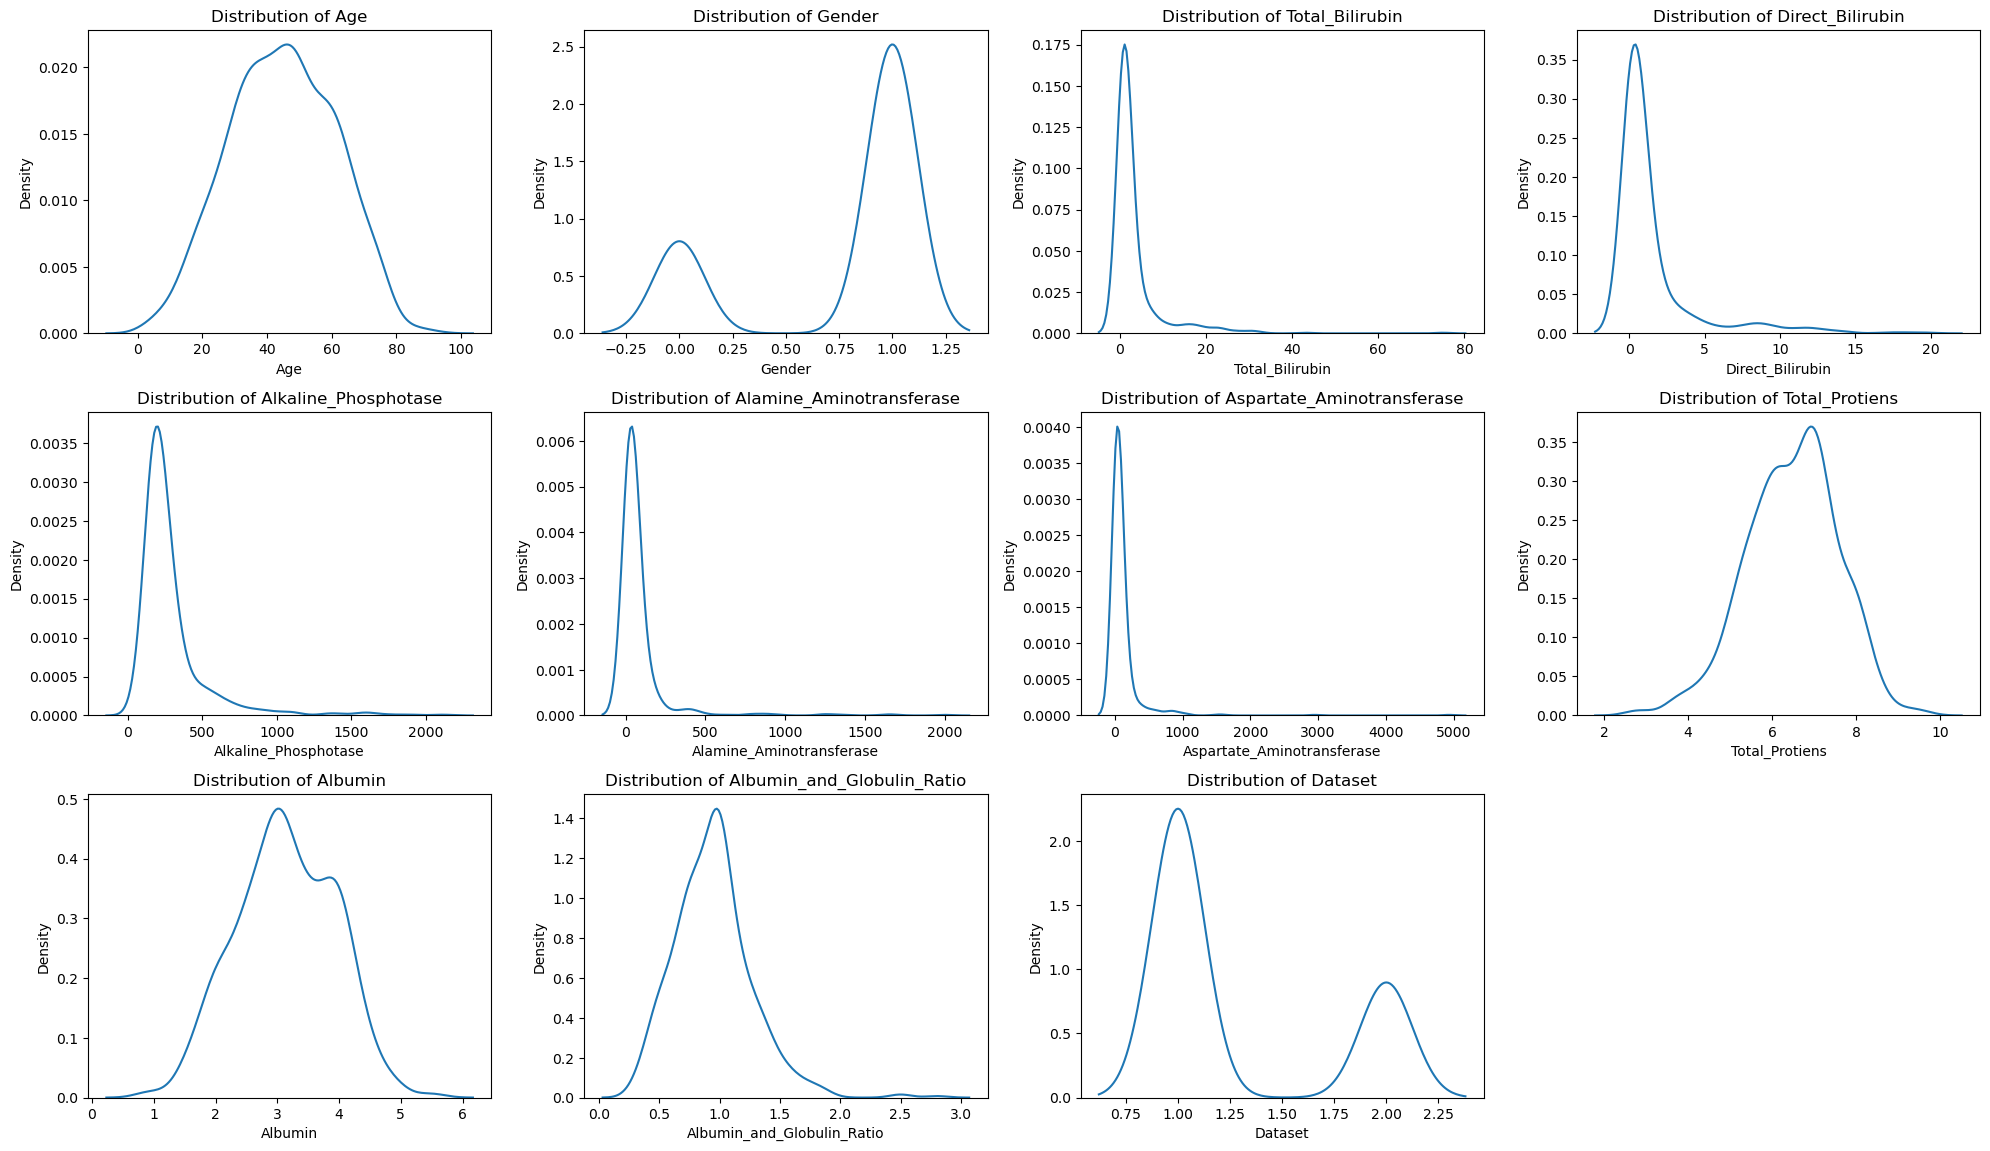

In [437]:
skewness = df.skew()
print(skewness)
plotnum=1
plt.figure(figsize=(20,15))
for i in df.columns:
    plt.subplot(4,4,plotnum)
    plotnum+=1
    sns.kdeplot(x=i,data=df)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

In [438]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
columns_to_transform=['Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
df[columns_to_transform]=pt.fit_transform(df[columns_to_transform])

In [439]:
print(df.skew())

Age                          -0.033591
Gender                       -1.209212
Total_Bilirubin               0.537212
Direct_Bilirubin              0.566945
Alkaline_Phosphotase         -0.047078
Alamine_Aminotransferase      0.088217
Aspartate_Aminotransferase    0.116612
Total_Protiens               -0.292433
Albumin                      -0.048516
Albumin_and_Globulin_Ratio    0.992299
Dataset                       0.955179
dtype: float64


In [440]:
df['Dataset'] = df['Dataset'].map({1:1, 2:0})

In [441]:
X = df.drop('Dataset', axis=1)
y = df['Dataset']

In [442]:
from imblearn.over_sampling import RandomOverSampler
smote = RandomOverSampler()
X_res, y_res = smote.fit_resample(X, y)

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
precision_weighted = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision_weighted:.2f}")

Random Forest Accuracy: 0.80
Precision: 0.82


In [447]:

xgb_model =model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    random_state=42,
    eval_metric='logloss',
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8193
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        83
           1       0.90      0.72      0.80        83

    accuracy                           0.82       166
   macro avg       0.83      0.82      0.82       166
weighted avg       0.83      0.82      0.82       166

Confusion Matrix:
 [[76  7]
 [23 60]]


In [445]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8373
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        83
           1       0.91      0.75      0.82        83

    accuracy                           0.84       166
   macro avg       0.85      0.84      0.84       166
weighted avg       0.85      0.84      0.84       166

Confusion Matrix:
 [[77  6]
 [21 62]]


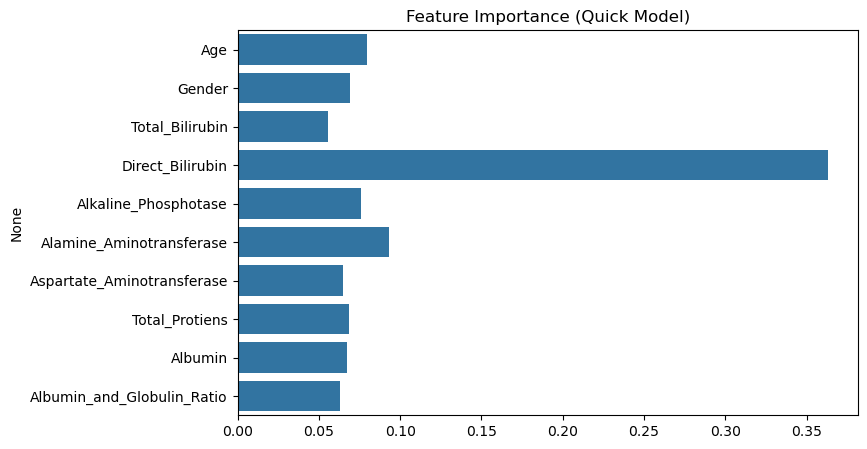

In [446]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance (Quick Model)")
plt.show()